<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons # creara nuestro dataframe con data points y formas de lunas
from sklearn.cluster import DBSCAN  # librería para hacer el DBSCAN
from sklearn.metrics import silhouette_score  # para medir el coeficiente del modelo con DBSCAN

## Preparando datos de prueba

In [8]:
# Creamos nuestro df de dos dimensiones, pero sin columna de cluster
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True )

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

In [9]:
# Creamos df con forma de luna
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1]
    }
)

## Visualización de datos

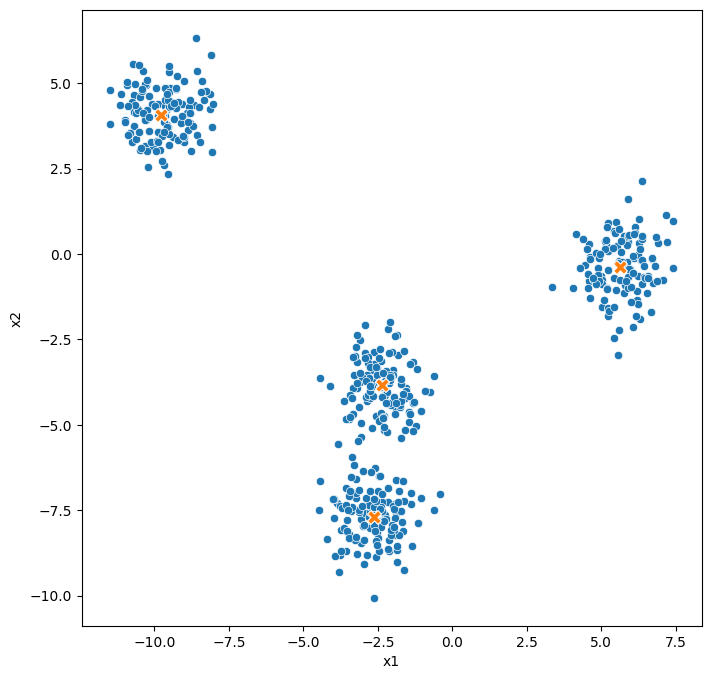

In [10]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.plot()
plt.show()

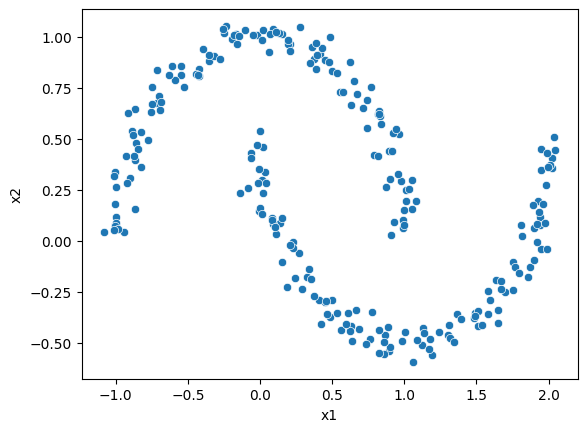

In [11]:
# Visualizamos las lunas que queremos graficar
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.show()

## Implementando DBSCAN

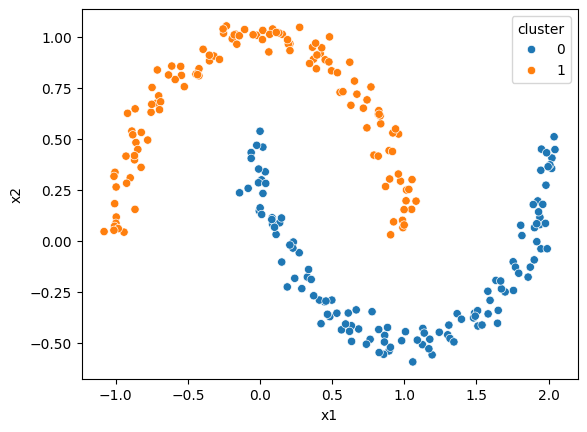

In [13]:
# definimos objeto que tendrá la función DBSCAN
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)   # procedemos con la predicción de data points formas de lunas
df_moons['cluster'] = y_m_predict   # le agregamos un campo o columna a df_moons con los valores de la predicción
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

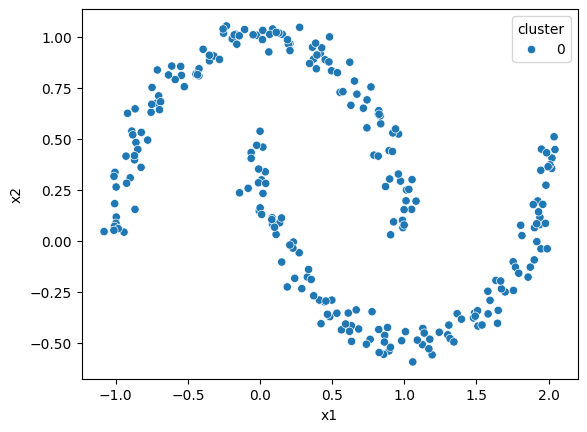

In [14]:
# definimos objeto que tendrá la función DBSCAN
dbscan_cluster = DBSCAN(eps=10, min_samples=15)
y_m_predict = dbscan_cluster.fit_predict(X_m)   # procedemos con la predicción de data points formas de lunas
df_moons['cluster'] = y_m_predict   # le agregamos un campo o columna a df_moons con los valores de la predicción
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

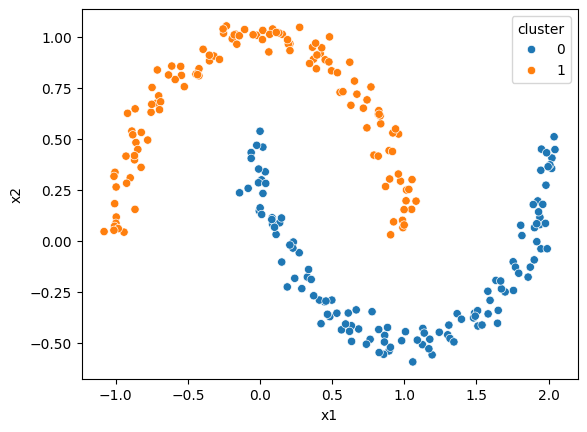

In [15]:
# definimos objeto que tendrá la función DBSCAN
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)   # procedemos con la predicción de data points formas de lunas
df_moons['cluster'] = y_m_predict   # le agregamos un campo o columna a df_moons con los valores de la predicción
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

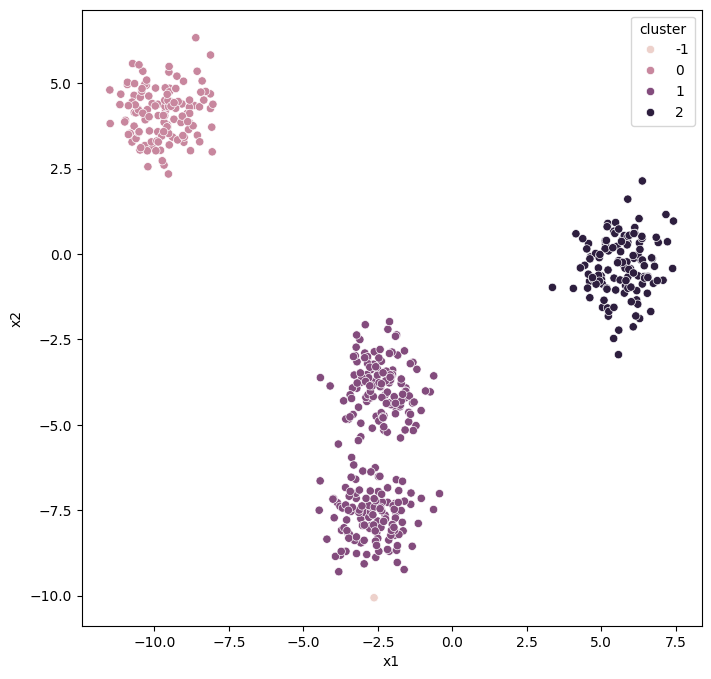

In [19]:
# Ahora resolveremos el problema con nuestro df de X

dbscan = DBSCAN(eps=1, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

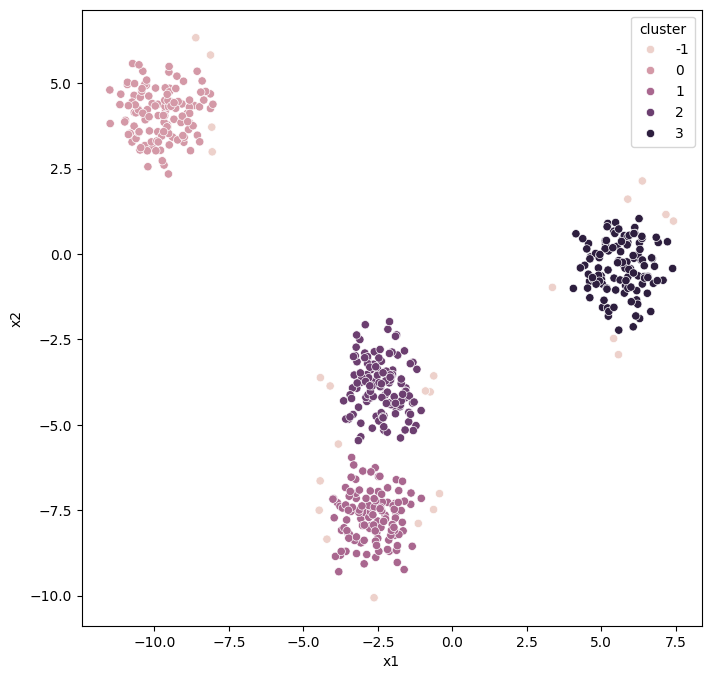

In [20]:
# Ahora resolveremos el problema con nuestro df de X
# Pero con eps=0.5

dbscan = DBSCAN(eps=0.5, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

# Hyperparameters

## Evaluación de DBSCAN